In [40]:
import numpy as np
import pandas as pd
from seaborn import heatmap
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer
from sklearn.model_selection import cross_val_score

  0%|          | 0/7 [4:19:00<?, ?it/s]


In [41]:
df = pd.read_csv('dataset_ZavarzinE_(baseline).csv', index_col=False)
y_cols = ['химшлак последний Al2O3', 'химшлак последний CaO', 
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']
X = df.drop(columns=y_cols)
y = df.filter(y_cols)
del df
print('X:', X.shape)
print('y', y.shape)

X: (6285, 53)
y (6285, 7)


<AxesSubplot:>

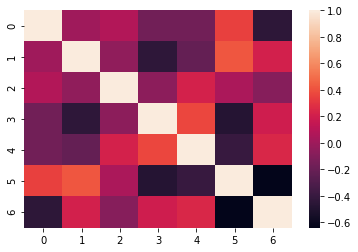

In [43]:
cov = np.corrcoef(y.transpose())
heatmap(cov)

In [35]:
mape_scorer = make_scorer(mean_absolute_percentage_error)
report = []
def check_model(estimator, name):
    results = {y_col: cross_val_score(estimator, X, y[y_col], cv=10, n_jobs=-1,
                           scoring=mape_scorer).mean() for y_col in tqdm(y_cols) }
    report.append([name] + list(results.values()))
    return results

In [36]:
check_model(LinearRegression(), 'LinearRegression')




  0%|          | 0/7 [00:00<?, ?it/s]


 14%|█▍        | 1/7 [00:03<00:22,  3.74s/it]


 29%|██▊       | 2/7 [00:04<00:08,  1.77s/it]


 43%|████▎     | 3/7 [00:04<00:04,  1.16s/it]


 57%|█████▋    | 4/7 [00:04<00:02,  1.15it/s]


 71%|███████▏  | 5/7 [00:05<00:01,  1.44it/s]


 86%|████████▌ | 6/7 [00:05<00:00,  1.65it/s]


100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


{'химшлак последний Al2O3': 0.09115170463041793,
 'химшлак последний CaO': 0.048195301686282596,
 'химшлак последний FeO': 0.3515216599509753,
 'химшлак последний MgO': 0.260390379775653,
 'химшлак последний MnO': 0.303699709034601,
 'химшлак последний R': 0.061509893566057336,
 'химшлак последний SiO2': 0.05637428967169842}

In [37]:
check_model(RandomForestRegressor(), 'RandomForestRegressor')




  0%|          | 0/7 [00:00<?, ?it/s]


 14%|█▍        | 1/7 [01:11<07:11, 71.90s/it]


 29%|██▊       | 2/7 [02:47<07:08, 85.64s/it]


 43%|████▎     | 3/7 [04:02<05:24, 81.06s/it]


 57%|█████▋    | 4/7 [05:16<03:54, 78.02s/it]


 71%|███████▏  | 5/7 [06:39<02:40, 80.09s/it]


 86%|████████▌ | 6/7 [07:58<01:19, 79.68s/it]


100%|██████████| 7/7 [09:22<00:00, 80.39s/it]


{'химшлак последний Al2O3': 0.08605089803275737,
 'химшлак последний CaO': 0.04852707614271097,
 'химшлак последний FeO': 0.3576870903211999,
 'химшлак последний MgO': 0.26545421145048154,
 'химшлак последний MnO': 0.3330290697279782,
 'химшлак последний R': 0.061186507742516626,
 'химшлак последний SiO2': 0.05397385987445581}

In [38]:
check_model(GradientBoostingRegressor(), 'GradientBoostingRegressor')




  0%|          | 0/7 [00:00<?, ?it/s]


 14%|█▍        | 1/7 [00:18<01:51, 18.62s/it]


 29%|██▊       | 2/7 [00:36<01:31, 18.23s/it]


 43%|████▎     | 3/7 [00:54<01:11, 17.99s/it]


 57%|█████▋    | 4/7 [01:11<00:53, 17.80s/it]


 71%|███████▏  | 5/7 [01:29<00:35, 17.72s/it]


 86%|████████▌ | 6/7 [01:47<00:17, 17.77s/it]


100%|██████████| 7/7 [02:05<00:00, 17.87s/it]


{'химшлак последний Al2O3': 0.08845145157139603,
 'химшлак последний CaO': 0.04836890359303396,
 'химшлак последний FeO': 0.3533832934996256,
 'химшлак последний MgO': 0.2646526982653715,
 'химшлак последний MnO': 0.3166207401765177,
 'химшлак последний R': 0.05994036216783997,
 'химшлак последний SiO2': 0.055086861631712614}

In [39]:
with open('report.csv', 'w') as report_file:
    report_file.writelines(['\t'.join(map(str, report_line)).replace('.', ',')+'\n' for report_line in report])